<a href="https://colab.research.google.com/github/kike22-22/IA/blob/main/Pr%C3%A1ctica_2_Perceptr%C3%B3n_multicapa_Fuente_de_datos_personal_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Agregar bloque entrecomillado


# Práctica 2 - Perceptrón multicapa Fuente de datos personal

     Sequence   mcg   gvh   lip  chg   aac  alm1  alm2 class
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp


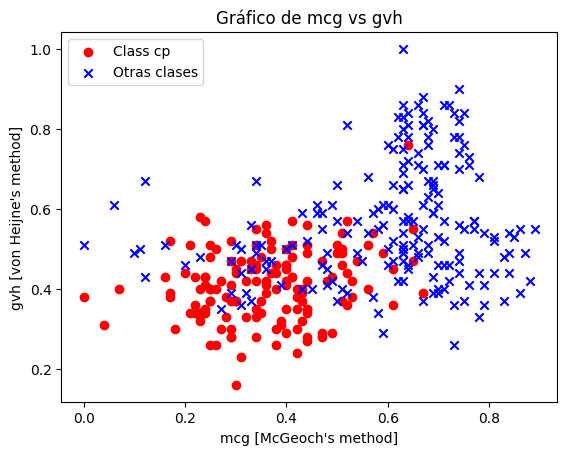

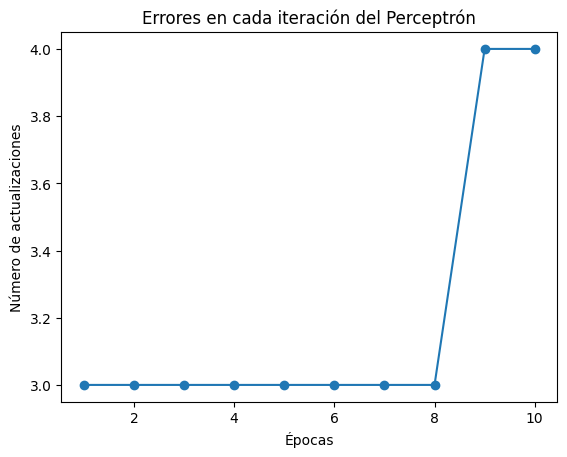

In [8]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Clase Perceptrón
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Cargar el conjunto de datos ecoli desde la URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
                 sep='\s+', header=None, names=['Sequence', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class'])

# Verificar que los datos fueron cargados correctamente
print(df.head())

# Seleccionar las clases de la columna 'class'
y = df['class'].values
# asignar las clases
y = np.where(y == 'cp', -1, 1)

# Seleccionar las características (para graficar)
X = df[['mcg', 'gvh']].values

# Graficar los datos
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='o', label='Class cp')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Otras clases')
plt.xlabel('mcg [McGeoch\'s method]')
plt.ylabel('gvh [von Heijne\'s method]')
plt.legend(loc='upper left')
plt.title('Gráfico de mcg vs gvh')
plt.show()

# Entrenar el modelo de perceptrón con las nuevas características
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar el número de errores durante cada época (iteración)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.title('Errores en cada iteración del Perceptrón')
plt.show()
